### Generating a Time x Threads Graph for SVT-AV1, EVC and VVENC

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

csv_path = "~/VC/tests/csv/threads.csv"
p = str(Path('~').expanduser()) 
csv_path = csv_path.replace('~', p)

df = pd.read_csv(csv_path)
df

,codec,sequence,threads,total time,qp
0,svt,bowing,1,13.945,32
1,svt,bowing,2,10.160,32
2,svt,bowing,4,9.887,32
3,svt,bowing,8,6.718,32
4,evc,bowing,1,25.257,32
5,evc,bowing,2,15.822,32
6,evc,bowing,4,15.297,32
7,evc,bowing,8,20.964,32
8,vvcodec,bowing,1,11.541,32
9,vvcodec,bowing,2,4.759,32


In [3]:
svt_r = df.loc[df["codec"] == "svt"]
evc_r = df.loc[df["codec"] == "evc"]
vvcodec_r = df.loc[df["codec"] == "vvcodec"]
svt_r

,codec,sequence,threads,total time,qp
0,svt,bowing,1,13.945,32
1,svt,bowing,2,10.160,32
2,svt,bowing,4,9.887,32
3,svt,bowing,8,6.718,32


[Text(0, 0, 'SVT_AV1'), Text(1, 0, 'XEVE-EVC'), Text(2, 0, 'VVENC')]

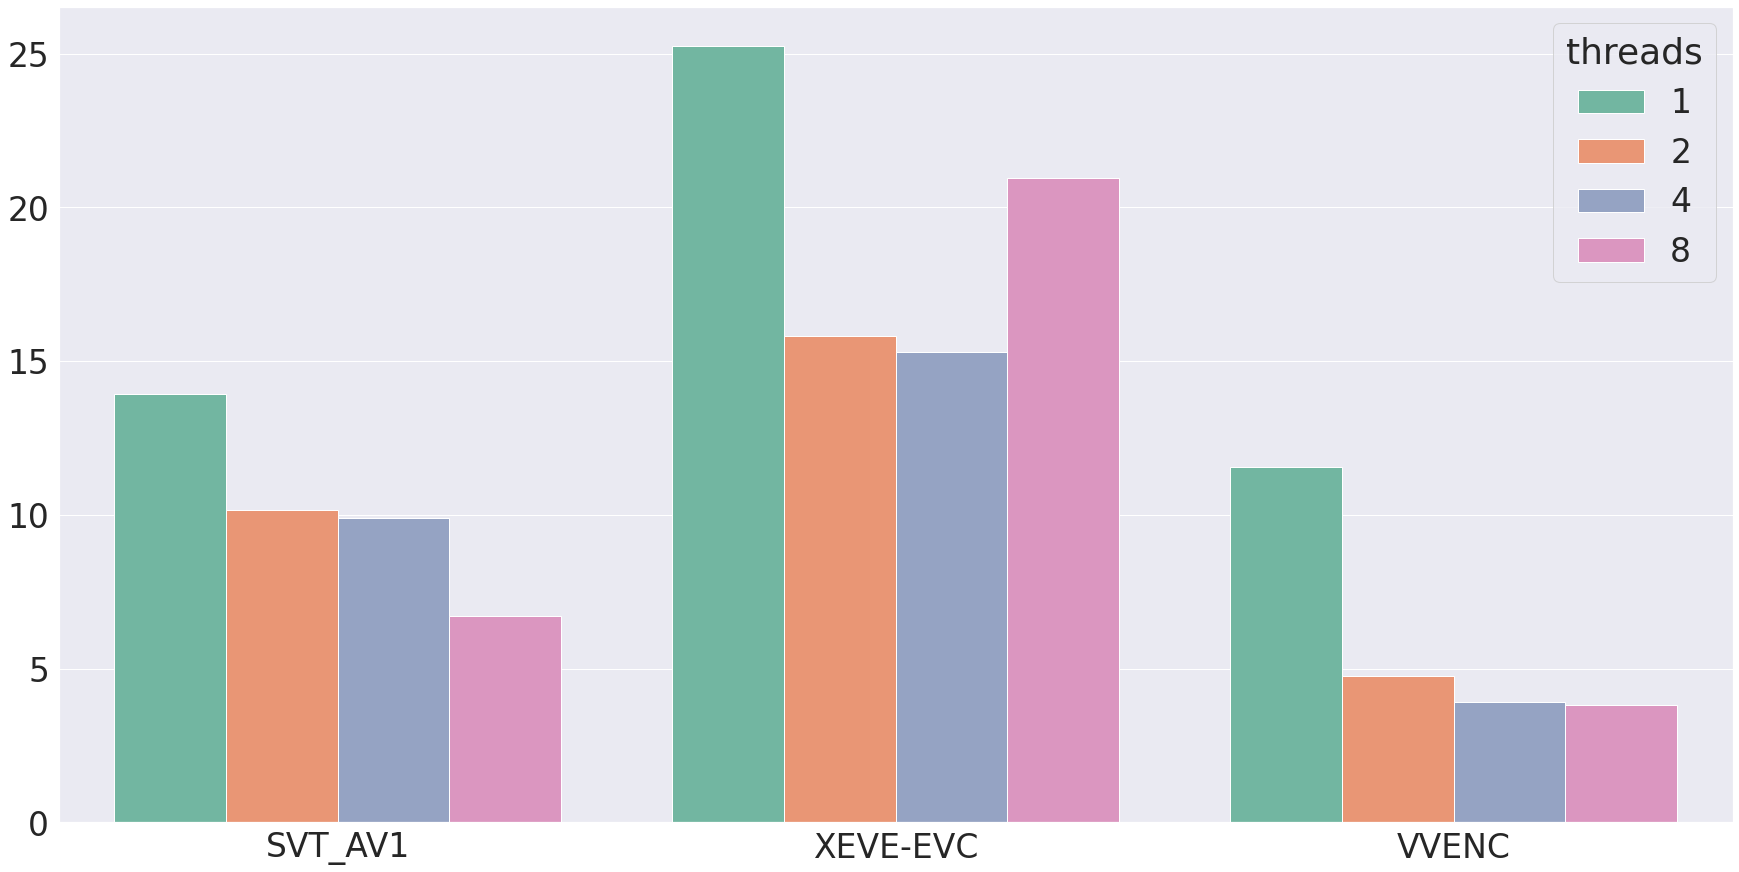

In [7]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

bar = sns.barplot(
    data=df,
    x="codec",
    y="total time",
    hue="threads"
)

sns.set(rc={'figure.figsize':(30,15)})
sns.set(font_scale = 4)
#plt.setp(bar.get_legend().get_texts(), fontsize='25') 
#plt.setp(bar.get_legend().get_title(), fontsize='25') 
bar.set(xlabel=None, ylabel=None)

bar.set_xticks(range(3))
bar.set_xticklabels(["SVT_AV1", "XEVE-EVC", "VVENC"])